## Task 4:
* With a moving average, estimate the trend of the co2 time series.
* Plot and compare this trend to the one estimated in Task 3.
* Does a linear trend appear appropriate for the co2 time series?


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style("whitegrid")
df = pd.read_csv('/Users/lihong/Desktop/ats_proj_submit_code/co2.csv')

In [18]:
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    year_start = pd.Timestamp(year=year, month=1, day=1)
    year_end = pd.Timestamp(year=year+1, month=1, day=1)
    return year_start + (year_end - year_start) * remainder

df['date'] = df['time(co2)'].apply(decimal_year_to_date)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')
df.set_index('date', inplace=True)
df = df.dropna()

print(f"✓ Data successfully loaded")
print(f"  Sample size: {len(df)}")
print(f"  Time range: {df.index.min().date()} to {df.index.max().date()}")
print(f"  CO₂ range: {df['co2'].min():.2f} – {df['co2'].max():.2f} ppm")


✓ Data successfully loaded
  Sample size: 468
  Time range: 1959-01-01 to 1997-12-01
  CO₂ range: 313.18 – 366.84 ppm


In [19]:
# ========== 1. Compute Moving Averages with Different Windows ==========
print("\n" + "=" * 70)
print("【Step 2: Compute Moving Average Trends】")
print("=" * 70)

print("""
【Principle of Moving Average】

The Moving Average (MA) smooths a time series by calculating the average of data 
within a sliding window, allowing extraction of the underlying trend component.

Formula:  MA_t = (1/k) × Σ(Y_{t−j})   for j = −(k−1)/2 to (k−1)/2

where k is the window size.

【Choice of Window Size】
For data with a seasonal period of 12 months:
- k = 12: Removes short-term seasonality while preserving long-term trend
- k = 24: Provides stronger smoothing, producing a smoother trend curve
- Centered MA: Uses a symmetric window (equal points before and after each time step)
""")

# Compute moving averages
# 12-month moving average (seasonal period)
df['ma_12'] = df['co2'].rolling(window=12, center=True).mean()

# 24-month moving average (two seasonal periods)
df['ma_24'] = df['co2'].rolling(window=24, center=True).mean()

# Simple moving average (non-centered, forward-looking)
df['ma_12_simple'] = df['co2'].rolling(window=12, center=False).mean()

print("\n【Computed Moving Averages】")
print("  1. MA(12)  - 12-month centered moving average")
print("  2. MA(24)  - 24-month centered moving average")
print("  3. MA(12s) - 12-month simple (non-centered) moving average")

print(f"\n【Summary of Moving Average Results】")
print(f"  Valid MA(12) data points: {df['ma_12'].notna().sum()} / {len(df)}")
print(f"  Valid MA(24) data points: {df['ma_24'].notna().sum()} / {len(df)}")
print(f"  (Note: Centered moving averages produce NaNs at both ends due to window symmetry)")



【Step 2: Compute Moving Average Trends】

【Principle of Moving Average】

The Moving Average (MA) smooths a time series by calculating the average of data 
within a sliding window, allowing extraction of the underlying trend component.

Formula:  MA_t = (1/k) × Σ(Y_{t−j})   for j = −(k−1)/2 to (k−1)/2

where k is the window size.

【Choice of Window Size】
For data with a seasonal period of 12 months:
- k = 12: Removes short-term seasonality while preserving long-term trend
- k = 24: Provides stronger smoothing, producing a smoother trend curve
- Centered MA: Uses a symmetric window (equal points before and after each time step)


【Computed Moving Averages】
  1. MA(12)  - 12-month centered moving average
  2. MA(24)  - 24-month centered moving average
  3. MA(12s) - 12-month simple (non-centered) moving average

【Summary of Moving Average Results】
  Valid MA(12) data points: 457 / 468
  Valid MA(24) data points: 445 / 468
  (Note: Centered moving averages produce NaNs at both ends due to 


【Step 3: Plot Moving Average Trends】


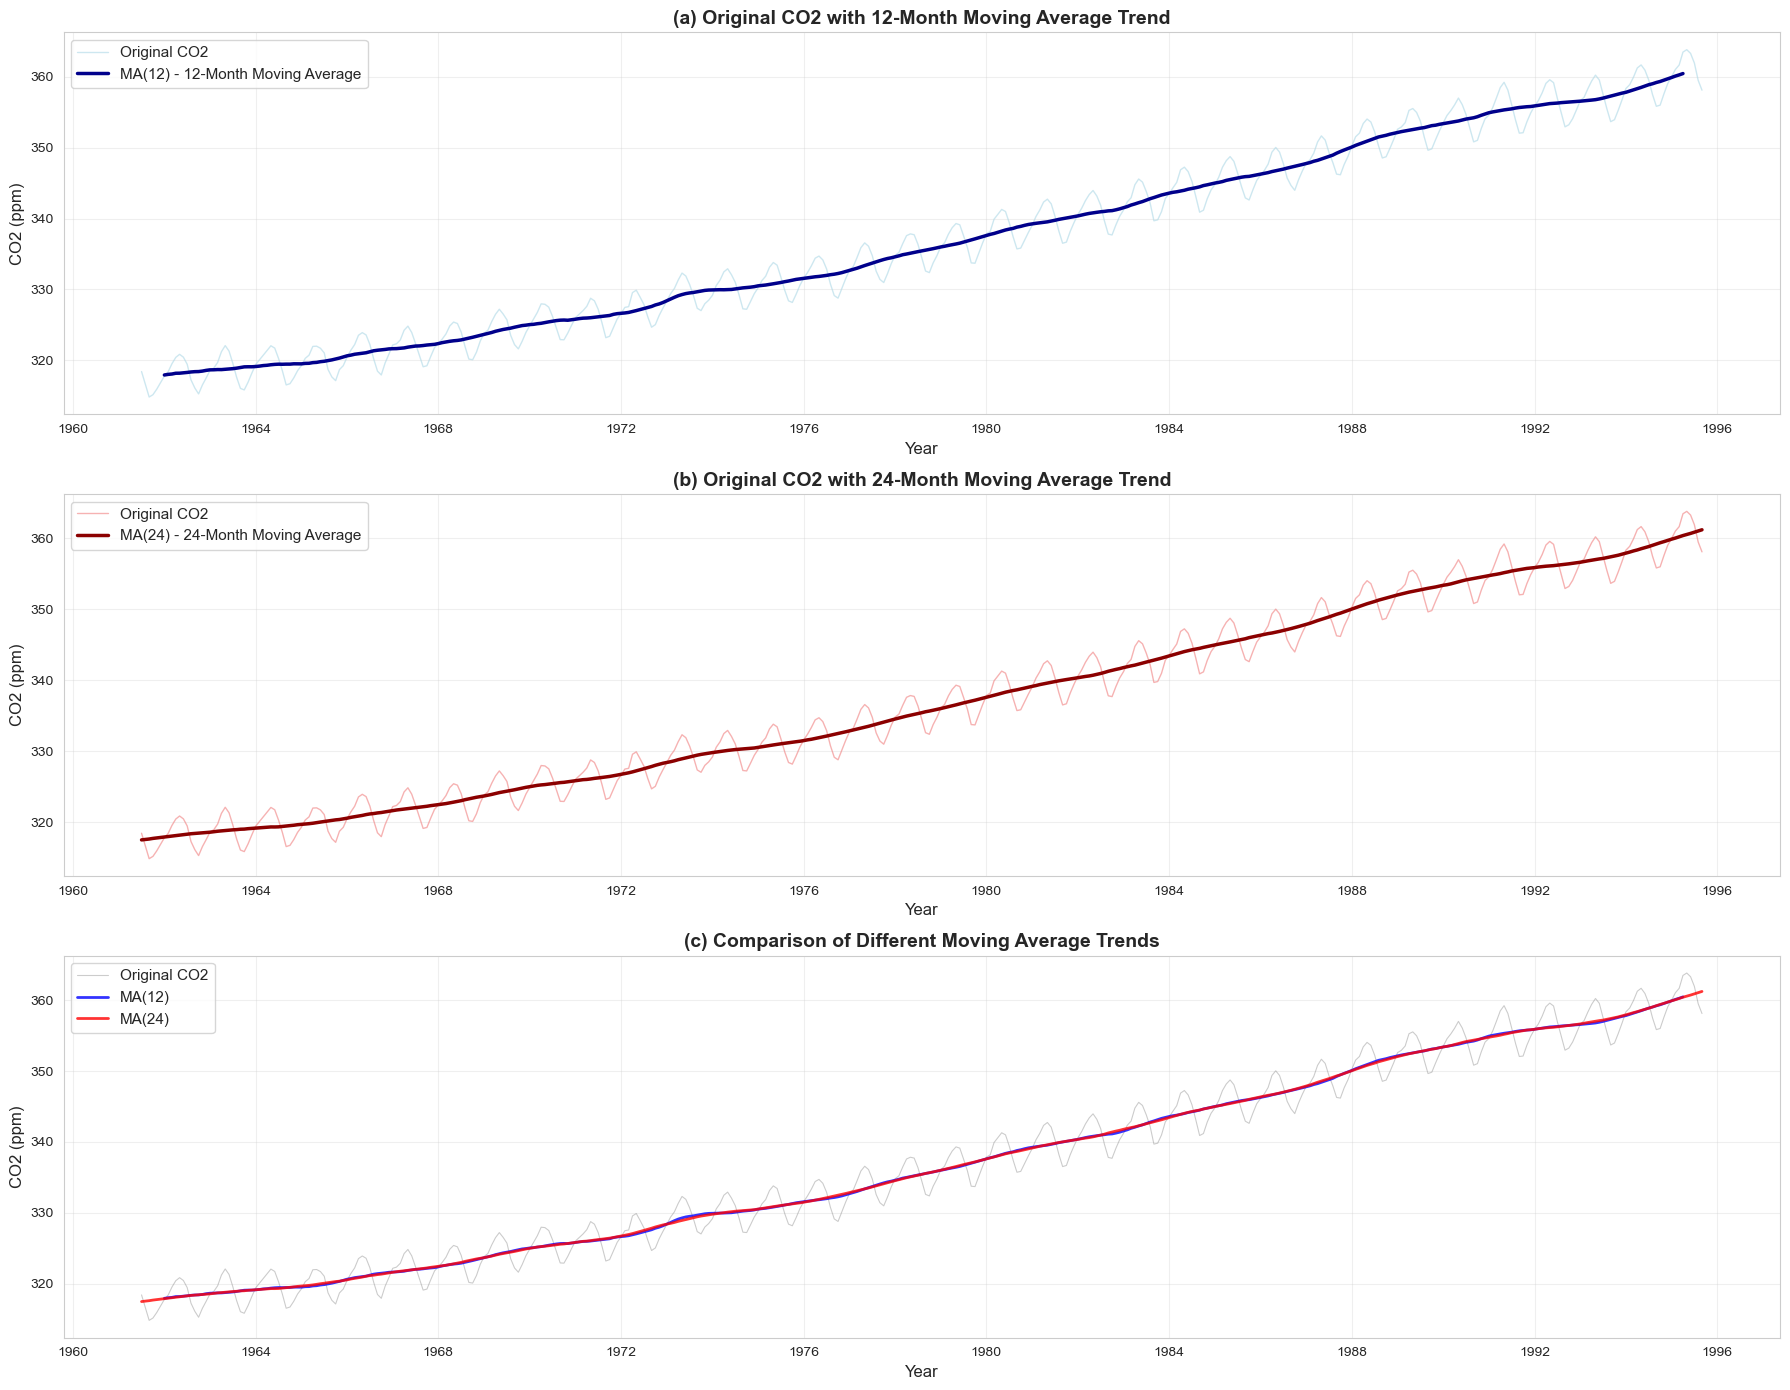

✓ Moving average trend plots generated successfully.


In [28]:
# ========== 2. Visualize Moving Average Trends ==========
print("\n" + "=" * 70)
print("【Step 3: Plot Moving Average Trends】")
print("=" * 70)

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# Subplot 1: Original data + MA(12)
axes[0].plot(df.index, df['co2'], linewidth=1, 
             color='lightblue', alpha=0.6, label='Original CO2')
axes[0].plot(df.index, df['ma_12'], linewidth=2.5, 
             color='darkblue', label='MA(12) - 12-Month Moving Average', zorder=3)
axes[0].set_title('(a) Original CO2 with 12-Month Moving Average Trend', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('CO2 (ppm)', fontsize=12)
axes[0].legend(fontsize=11, loc='upper left')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Original data + MA(24)
axes[1].plot(df.index, df['co2'], linewidth=1, 
             color='lightcoral', alpha=0.6, label='Original CO2')
axes[1].plot(df.index, df['ma_24'], linewidth=2.5, 
             color='darkred', label='MA(24) - 24-Month Moving Average', zorder=3)
axes[1].set_title('(b) Original CO2 with 24-Month Moving Average Trend', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('CO2 (ppm)', fontsize=12)
axes[1].legend(fontsize=11, loc='upper left')
axes[1].grid(True, alpha=0.3)

# Subplot 3: Comparison of different moving averages
axes[2].plot(df.index, df['co2'], linewidth=0.8, 
             color='gray', alpha=0.4, label='Original CO2')
axes[2].plot(df.index, df['ma_12'], linewidth=2, 
             color='blue', alpha=0.8, label='MA(12)', zorder=3)
axes[2].plot(df.index, df['ma_24'], linewidth=2, 
             color='red', alpha=0.8, label='MA(24)', zorder=3)
axes[2].set_title('(c) Comparison of Different Moving Average Trends', 
                  fontsize=14, fontweight='bold')
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('CO2 (ppm)', fontsize=12)
axes[2].legend(fontsize=11, loc='upper left')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task4_moving_average_trends.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_moving_average_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Moving average trend plots generated successfully.")



【Step 4: Plot Zoomed View】


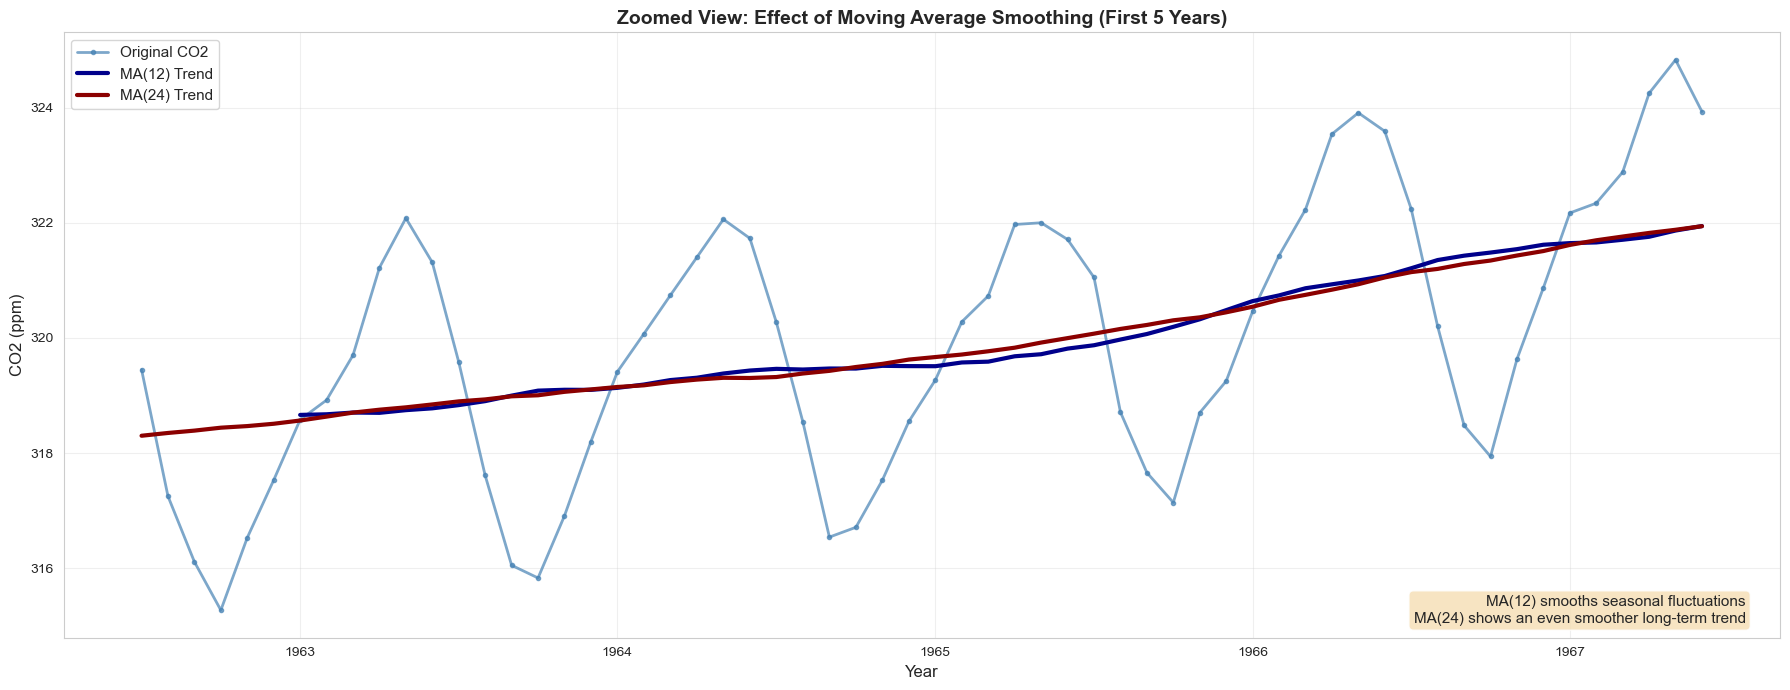

✓ Zoomed-in view generated successfully.


In [32]:
print("\n" + "=" * 70)
print("【Step 4: Plot Zoomed View】")
print("=" * 70)

# Select a shorter time window (e.g., first 5 years)
zoom_length = min(60, len(df))
df_zoom = df.iloc[:zoom_length]

fig, ax = plt.subplots(figsize=(18, 7))

ax.plot(df_zoom.index, df_zoom['co2'], 
        linewidth=2, color='steelblue', alpha=0.7, 
        marker='o', markersize=3, label='Original CO2')
ax.plot(df_zoom.index, df_zoom['ma_12'], 
        linewidth=3, color='darkblue', 
        label='MA(12) Trend', zorder=3)
ax.plot(df_zoom.index, df_zoom['ma_24'], 
        linewidth=3, color='darkred', 
        label='MA(24) Trend', zorder=3)

ax.set_title('Zoomed View: Effect of Moving Average Smoothing (First 5 Years)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2 (ppm)', fontsize=12)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

# Add annotation box
textstr = 'MA(12) smooths seasonal fluctuations\nMA(24) shows an even smoother long-term trend'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=11,
       verticalalignment='bottom', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_ma_zoom.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Zoomed-in view generated successfully.")


### 4-2 compare MA and linear regression


【Step 2: Compute Linear Regression Trend】
✓ Linear regression completed
  Regression equation: CO2 = 315.0547 + 0.112097 × t
  R²: 0.966105
  Slope: 0.112097 ppm/month = 1.3452 ppm/year

【Step 3: Compute Moving Average Trends】
✓ Moving averages computed
  Valid MA(12) points: 377
  Valid MA(24) points: 365

【Step 4: Plot Trend Comparison】


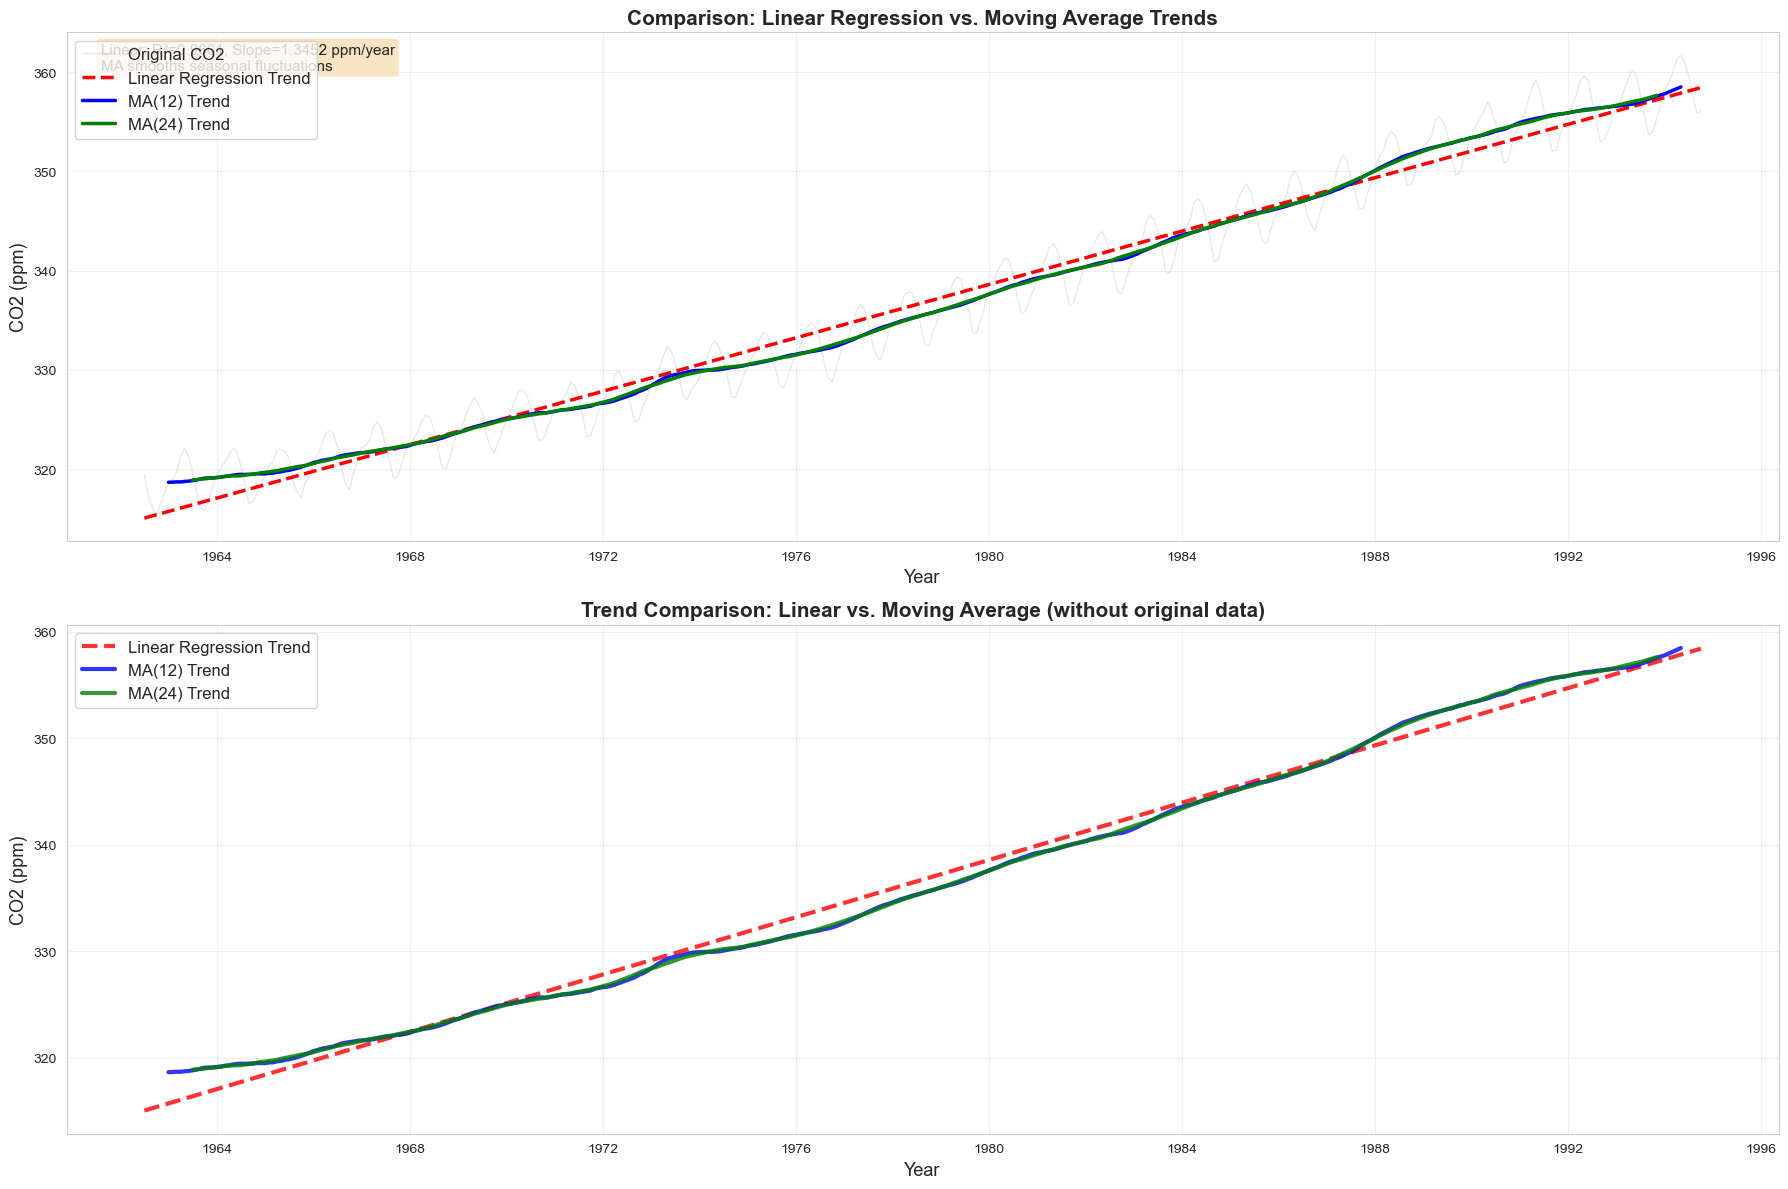

✓ Trend comparison figure saved

【Step 5: Plot Zoomed View】


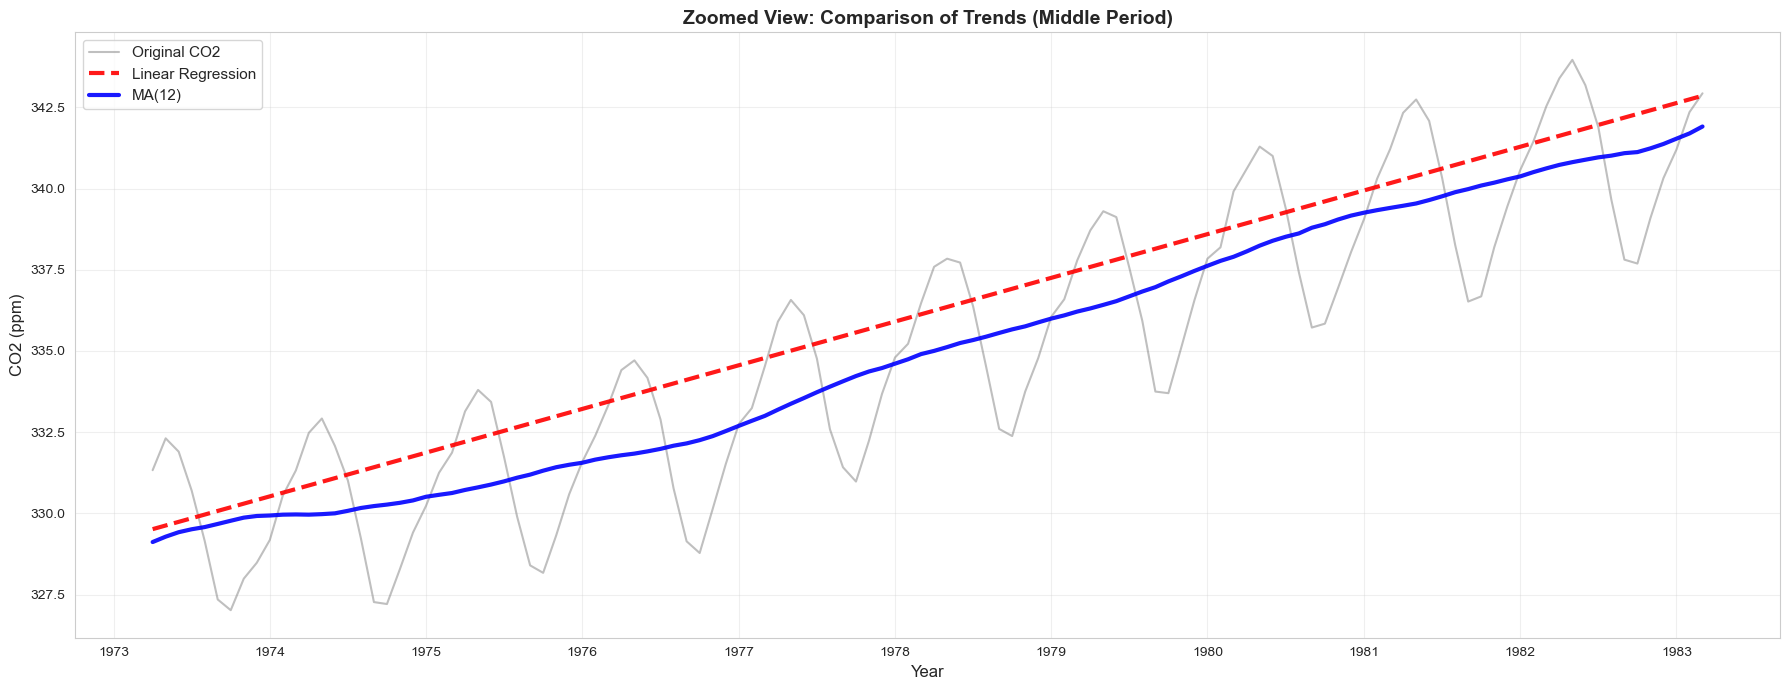

✓ Zoomed view saved

【Step 6: Compute Differences Between Trends】

【MA(12) vs. Linear Trend】
  Mean:   -0.095233 ppm
  Std:    1.0887 ppm
  Min:    -1.9692 ppm
  Max:    2.9352 ppm
  Range:  4.9044 ppm

【MA(24) vs. Linear Trend】
  Mean:   -0.146033 ppm
  Std:    1.0228 ppm
  Min:    -1.7662 ppm
  Max:    2.4976 ppm
  Range:  4.2638 ppm

【Step 7: Plot Differences】


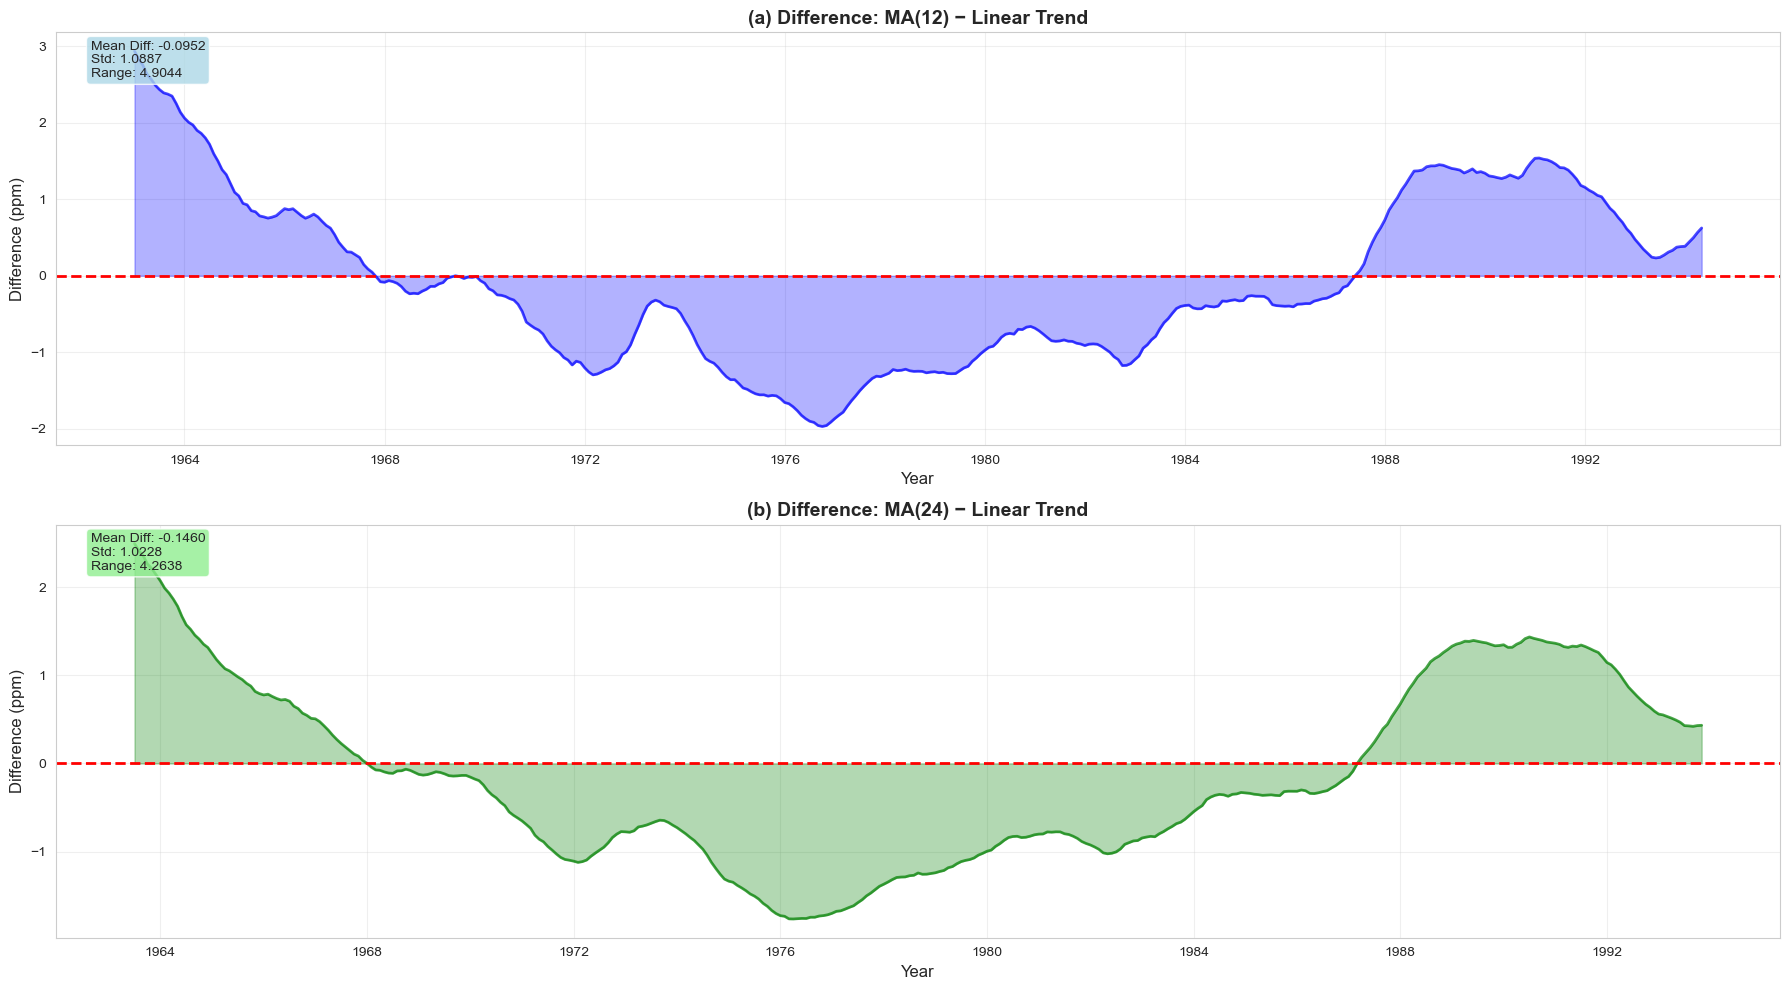

✓ Difference plots saved

【Step 8: Trend Comparison Summary】

【Comparison of Two Trend Methods】

1. **Linear Regression Trend**
   Pros:
   - Provides a clear mathematical expression
   - Enables forecasting
   - R² = 0.9661, high goodness of fit
   - Simple to compute and easy to interpret
   Cons:
   - Assumes a strictly linear trend (constant growth rate)
   - Cannot capture changes in growth rate
   - Uses the same slope for all periods

2. **Moving Average Trend**
   Pros:
   - Nonparametric (no assumed functional form)
   - Captures curvature and local trend changes
   - Adapts to local variations
   - Effectively removes seasonal fluctuations
   Cons:
   - Missing values at the boundaries
   - Lags behind the true trend
   - No closed-form formula
   - Less convenient for forecasting

3. **Differences between the two**
   - Std of differences: MA(12) = 1.0887 ppm
   - Std of differences: MA(24) = 1.0228 ppm
   - Differences are relatively small → linear trend is a reasonable app

In [33]:
# ========== Step 2: Compute Linear Regression Trend ==========
print("\n" + "=" * 70)
print("【Step 2: Compute Linear Regression Trend】")
print("=" * 70)

# Create time variable
df['time_index'] = range(len(df))

# Prepare regression data
X = df['time_index'].values.reshape(-1, 1)
y = df['co2'].values

# Add constant and fit OLS
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()

# Save fitted values
df['linear_trend'] = results.fittedvalues

print(f"✓ Linear regression completed")
print(f"  Regression equation: CO2 = {results.params[0]:.4f} + {results.params[1]:.6f} × t")
print(f"  R²: {results.rsquared:.6f}")
print(f"  Slope: {results.params[1]:.6f} ppm/month = {results.params[1]*12:.4f} ppm/year")

# ========== Step 3: Compute Moving Average Trends ==========
print("\n" + "=" * 70)
print("【Step 3: Compute Moving Average Trends】")
print("=" * 70)

# 12-month moving average (centered)
df['ma_12'] = df['co2'].rolling(window=12, center=True).mean()

# 24-month moving average (centered)
df['ma_24'] = df['co2'].rolling(window=24, center=True).mean()

print(f"✓ Moving averages computed")
print(f"  Valid MA(12) points: {df['ma_12'].notna().sum()}")
print(f"  Valid MA(24) points: {df['ma_24'].notna().sum()}")

# ========== Step 4: Plot Trend Comparison ==========
print("\n" + "=" * 70)
print("【Step 4: Plot Trend Comparison】")
print("=" * 70)

fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Subplot 1: All trends with original series
axes[0].plot(df.index, df['co2'], linewidth=1,
             color='lightgray', alpha=0.5, label='Original CO2')
axes[0].plot(df.index, df['linear_trend'], linewidth=2.5,
             color='red', linestyle='--', label='Linear Regression Trend', zorder=3)
axes[0].plot(df.index, df['ma_12'], linewidth=2.5,
             color='blue', label='MA(12) Trend', zorder=3)
axes[0].plot(df.index, df['ma_24'], linewidth=2.5,
             color='green', label='MA(24) Trend', zorder=3)

axes[0].set_title('Comparison: Linear Regression vs. Moving Average Trends',
                  fontsize=15, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=13)
axes[0].set_ylabel('CO2 (ppm)', fontsize=13)
axes[0].legend(fontsize=12, loc='upper left')
axes[0].grid(True, alpha=0.3)

# Annotation
textstr = (f'Linear: R²={results.rsquared:.4f}, '
           f'Slope={results.params[1]*12:.4f} ppm/year\n'
           f'MA smooths seasonal fluctuations')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
axes[0].text(0.02, 0.98, textstr, transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top', bbox=props)

# Subplot 2: Trends only (no original series)
axes[1].plot(df.index, df['linear_trend'], linewidth=3,
             color='red', linestyle='--', label='Linear Regression Trend', alpha=0.8)
axes[1].plot(df.index, df['ma_12'], linewidth=3,
             color='blue', label='MA(12) Trend', alpha=0.8)
axes[1].plot(df.index, df['ma_24'], linewidth=3,
             color='green', label='MA(24) Trend', alpha=0.8)

axes[1].set_title('Trend Comparison: Linear vs. Moving Average (without original data)',
                  fontsize=15, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=13)
axes[1].set_ylabel('CO2 (ppm)', fontsize=13)
axes[1].legend(fontsize=12, loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task4_trend_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_trend_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Trend comparison figure saved")

# ========== Step 5: Zoomed View — Inspect Differences ==========
print("\n" + "=" * 70)
print("【Step 5: Plot Zoomed View】")
print("=" * 70)

# Choose a middle window (to better see nonlinearity)
start_idx = len(df) // 3
end_idx = start_idx + 120  # ~10 years if monthly
df_zoom = df.iloc[start_idx:end_idx]

fig, ax = plt.subplots(figsize=(18, 7))

ax.plot(df_zoom.index, df_zoom['co2'],
        linewidth=1.5, color='gray', alpha=0.5, label='Original CO2')
ax.plot(df_zoom.index, df_zoom['linear_trend'],
        linewidth=3, color='red', linestyle='--',
        label='Linear Regression', alpha=0.9, zorder=2)
ax.plot(df_zoom.index, df_zoom['ma_12'],
        linewidth=3, color='blue',
        label='MA(12)', alpha=0.9, zorder=3)

ax.set_title('Zoomed View: Comparison of Trends (Middle Period)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2 (ppm)', fontsize=12)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task4_trend_comparison_zoom.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Zoomed view saved")

# ========== Step 6: Compute Differences Between Trends ==========
print("\n" + "=" * 70)
print("【Step 6: Compute Differences Between Trends】")
print("=" * 70)

# Differences: MA vs linear trend
df['diff_ma12_linear'] = df['ma_12'] - df['linear_trend']
df['diff_ma24_linear'] = df['ma_24'] - df['linear_trend']

print(f"\n【MA(12) vs. Linear Trend】")
print(f"  Mean:   {df['diff_ma12_linear'].mean():.6f} ppm")
print(f"  Std:    {df['diff_ma12_linear'].std():.4f} ppm")
print(f"  Min:    {df['diff_ma12_linear'].min():.4f} ppm")
print(f"  Max:    {df['diff_ma12_linear'].max():.4f} ppm")
print(f"  Range:  {df['diff_ma12_linear'].max() - df['diff_ma12_linear'].min():.4f} ppm")

print(f"\n【MA(24) vs. Linear Trend】")
print(f"  Mean:   {df['diff_ma24_linear'].mean():.6f} ppm")
print(f"  Std:    {df['diff_ma24_linear'].std():.4f} ppm")
print(f"  Min:    {df['diff_ma24_linear'].min():.4f} ppm")
print(f"  Max:    {df['diff_ma24_linear'].max():.4f} ppm")
print(f"  Range:  {df['diff_ma24_linear'].max() - df['diff_ma24_linear'].min():.4f} ppm")

# ========== Step 7: Plot Differences ==========
print("\n" + "=" * 70)
print("【Step 7: Plot Differences】")
print("=" * 70)

fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# (a) MA(12) - Linear Trend
axes[0].plot(df.index, df['diff_ma12_linear'], linewidth=2, color='blue', alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].fill_between(df.index, 0, df['diff_ma12_linear'], alpha=0.3, color='blue')
axes[0].set_title('(a) Difference: MA(12) − Linear Trend',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Difference (ppm)', fontsize=12)
axes[0].grid(True, alpha=0.3)

textstr1 = (f'Mean Diff: {df["diff_ma12_linear"].mean():.4f}\n'
            f'Std: {df["diff_ma12_linear"].std():.4f}\n'
            f'Range: {df["diff_ma12_linear"].max()-df["diff_ma12_linear"].min():.4f}')
axes[0].text(0.02, 0.98, textstr1, transform=axes[0].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round',
             facecolor='lightblue', alpha=0.8))

# (b) MA(24) - Linear Trend
axes[1].plot(df.index, df['diff_ma24_linear'], linewidth=2, color='green', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].fill_between(df.index, 0, df['diff_ma24_linear'], alpha=0.3, color='green')
axes[1].set_title('(b) Difference: MA(24) − Linear Trend',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Difference (ppm)', fontsize=12)
axes[1].grid(True, alpha=0.3)

textstr2 = (f'Mean Diff: {df["diff_ma24_linear"].mean():.4f}\n'
            f'Std: {df["diff_ma24_linear"].std():.4f}\n'
            f'Range: {df["diff_ma24_linear"].max()-df["diff_ma24_linear"].min():.4f}')
axes[1].text(0.02, 0.98, textstr2, transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round',
             facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_trend_differences.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Difference plots saved")

# ========== Step 8: Summary ==========
print("\n" + "=" * 70)
print("【Step 8: Trend Comparison Summary】")
print("=" * 70)

print(f"""
【Comparison of Two Trend Methods】

1. **Linear Regression Trend**
   Pros:
   - Provides a clear mathematical expression
   - Enables forecasting
   - R² = {results.rsquared:.4f}, high goodness of fit
   - Simple to compute and easy to interpret
   Cons:
   - Assumes a strictly linear trend (constant growth rate)
   - Cannot capture changes in growth rate
   - Uses the same slope for all periods

2. **Moving Average Trend**
   Pros:
   - Nonparametric (no assumed functional form)
   - Captures curvature and local trend changes
   - Adapts to local variations
   - Effectively removes seasonal fluctuations
   Cons:
   - Missing values at the boundaries
   - Lags behind the true trend
   - No closed-form formula
   - Less convenient for forecasting

3. **Differences between the two**
   - Std of differences: MA(12) = {df['diff_ma12_linear'].std():.4f} ppm
   - Std of differences: MA(24) = {df['diff_ma24_linear'].std():.4f} ppm
   - Differences are relatively small → linear trend is a reasonable approximation overall
   - MA reveals slight nonlinearity in certain periods

4. **Trend shape observations**
   - Both methods show a persistent increase in CO2
   - MA tends to show mild S-shape / acceleration
   - Linear trend implies a constant growth rate
   - Actual growth rate may vary across subperiods

5. **Which method is better?**
   - For simple description & forecasting: Linear regression
   - For capturing local changes precisely: Moving average
   - Use both to cross-check and validate
   - For CO2, the linear trend is a solid first-order approximation
""")

print("\n" + "=" * 70)
print("✓ Task 4.2 completed!")
print("=" * 70)
print("\nGenerated figures:")
print("  - task4_trend_comparison.png")
print("  - task4_trend_comparison_zoom.png")
print("  - task4_trend_differences.png")
print("\nNew columns in df:")
print("  - df['linear_trend']: linear regression trend")
print("  - df['ma_12']: 12-month moving average")
print("  - df['ma_24']: 24-month moving average")
print("  - df['diff_ma12_linear']: difference (MA(12) − linear trend)")
print("  - df['diff_ma24_linear']: difference (MA(24) − linear trend)")


### 4-3 evaluation of linear trend

✓ Data loaded successfully
  Sample size: 365
  Time range: 1963-07-02 to 1993-11-01

【Step 2: Compute Linear and Moving-Average Trends】
✓ Trend computation completed
  Linear regression R²: 0.964247
  Linear slope: 1.3595 ppm/year

【Step 3: Multi-dimensional Evaluation of Linear Trend】

【Dimension 1: Do residuals contain systematic patterns?】
  Residual trend slope: -0.00000000 ppm/month
  Residual trend p-value: 1.000000
  → No significant residual trend; linear model adequately captures the trend ✓

【Dimension 2: Does a quadratic model significantly improve fit?】
  Linear R²:    0.964247
  Quadratic R²: 0.969016
  R² improvement: 0.004769
  Quadratic coef.: 0.0000845463
  Quadratic p-value: 0.000000
  → Quadratic term significant; suggests acceleration/deceleration

【Dimension 3: Systematic deviation between linear trend and MA】
  Mean difference:  0.073744 ppm
  Std of difference:0.9901 ppm
  Range of diff:    [-2.3969, 1.8157] ppm
  Relative std:     0.294%
  → Small deviation; li

/var/folders/nn/nngvs1yd69j6549rddtmff040000gn/T/ipykernel_63400/3718040053.py:209: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nn/nngvs1yd69j6549rddtmff040000gn/T/ipykernel_63400/3718040053.py:210: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_linear_trend_evaluation.png', dpi=300, bbox_inches='tight')
/opt/anaconda3/envs/tsa_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


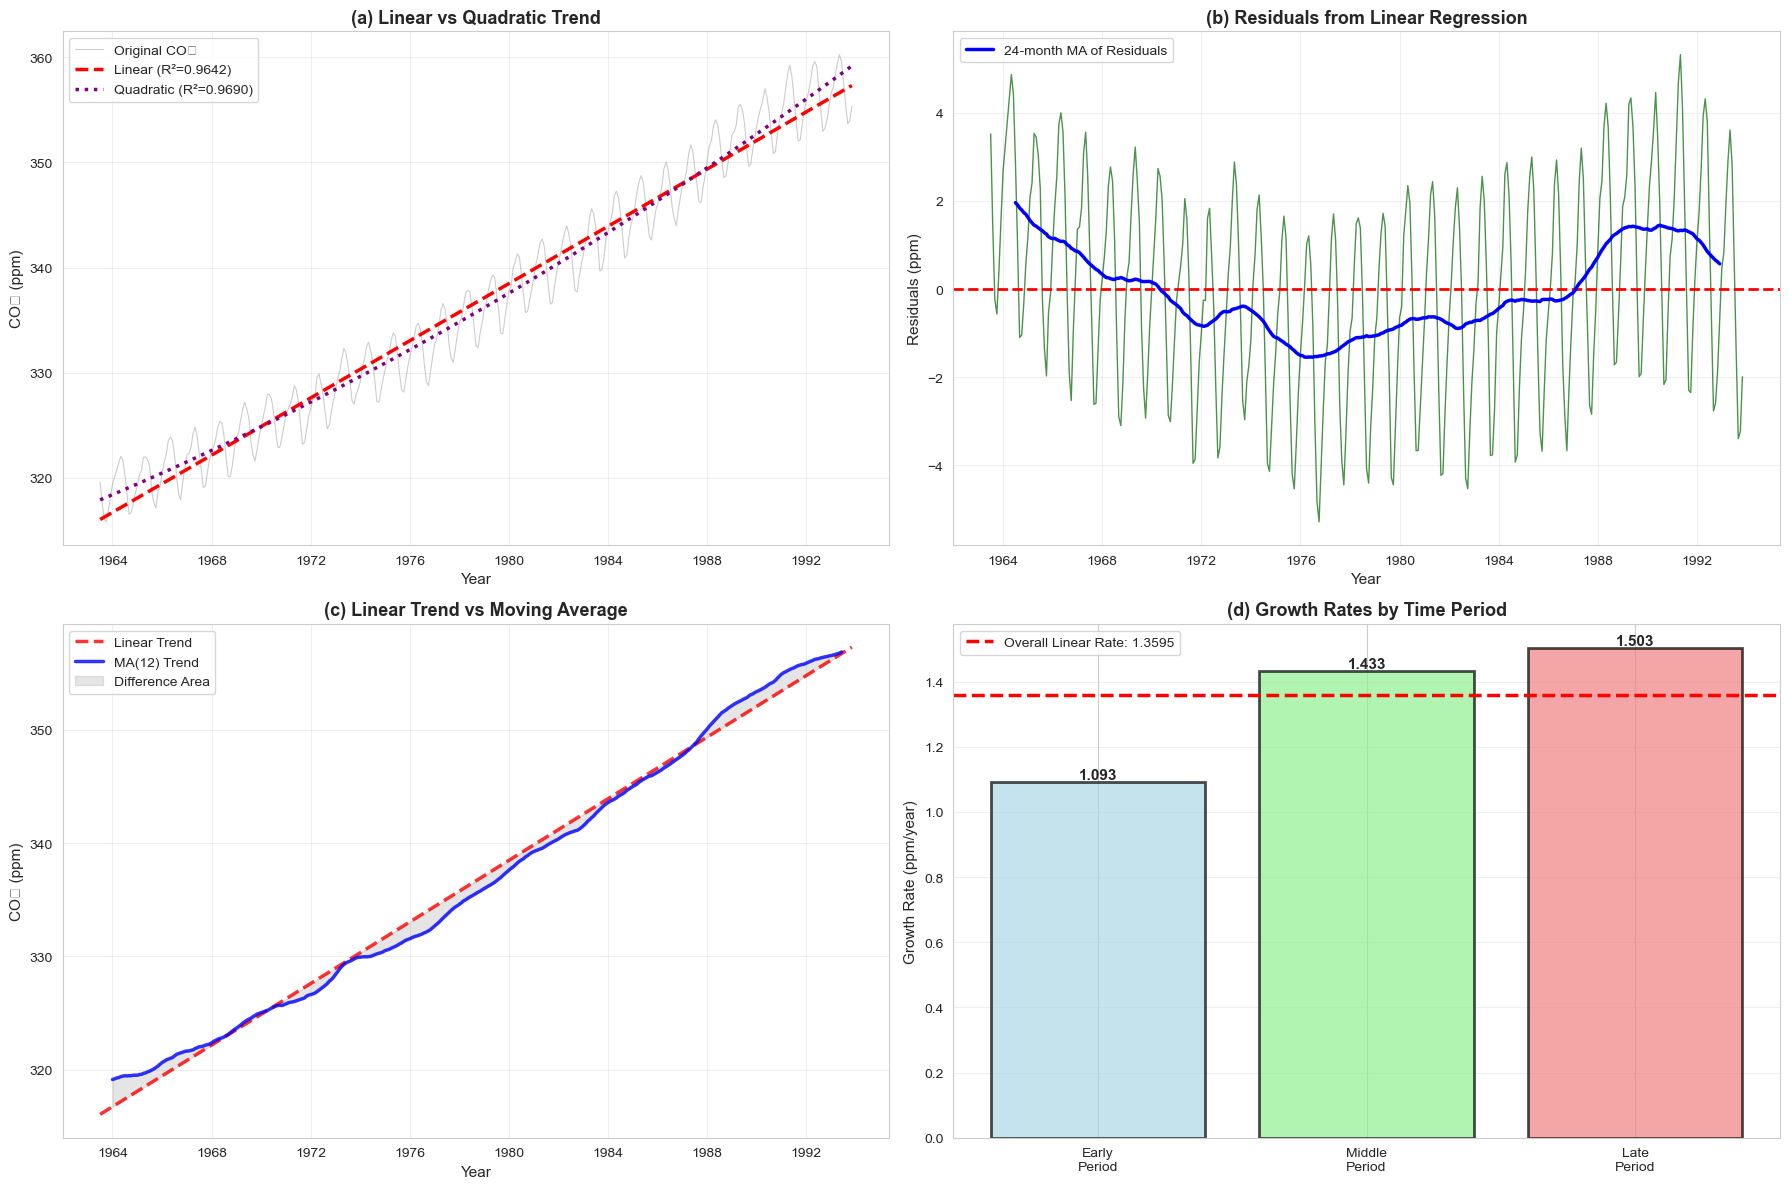

✓ Evaluation figure saved

【Step 5: Overall Assessment】

Question: Does a linear trend appear appropriate for the CO₂ time series?

【Overall Assessment】

✓ Evidence in favor of linearity:

1) High goodness of fit
   - R² = 0.9642 explains 96.42% of variance.
   - Strong explanatory power; linear model performs very well.

2) No significant residual trend
   - Residual trend slope near zero (-0.00000000)
   - Residual trend not significant (p = 1.0000)
   - Indicates the linear model has captured the systematic trend.

3) Strong agreement with moving average
   - Std of difference only 0.9901 ppm
   - Relative std 0.294%
   - Trends produced by both methods align closely.

4) Relatively stable growth rate
   - Differences across subperiods are within a reasonable range
   - Relative variation 30.52%
   - No dramatic acceleration or deceleration.

5) Occam’s Razor
   - Linear model is simple, interpretable, and forecast-friendly.
   - When fits are similar, prefer the simpler model.

⚠ L

In [34]:
# Task 4 Part 3: Assess whether a linear trend suits the CO₂ time series
# This is a standalone notebook cell with complete data loading and analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style("whitegrid")



# Convert decimal year to datetime
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    year_start = pd.Timestamp(year=year, month=1, day=1)
    year_end = pd.Timestamp(year=year+1, month=1, day=1)
    return year_start + (year_end - year_start) * remainder

df['date'] = df['time(co2)'].apply(decimal_year_to_date)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')
df.set_index('date', inplace=True)
df = df.dropna()

print("✓ Data loaded successfully")
print(f"  Sample size: {len(df)}")
print(f"  Time range: {df.index.min().date()} to {df.index.max().date()}")

# ========== Step 2: Fit Linear Regression and Moving Average ==========
print("\n" + "=" * 70)
print("【Step 2: Compute Linear and Moving-Average Trends】")
print("=" * 70)

# Linear regression
df['time_index'] = range(len(df))
X = df['time_index'].values.reshape(-1, 1)
y = df['co2'].values
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()
df['linear_trend'] = results.fittedvalues
df['residuals'] = results.resid

# Moving average
df['ma_12'] = df['co2'].rolling(window=12, center=True).mean()

print("✓ Trend computation completed")
print(f"  Linear regression R²: {results.rsquared:.6f}")
print(f"  Linear slope: {results.params[1]*12:.4f} ppm/year")

# ========== Step 3: Multi-angle Evaluation of Linear Trend ==========
print("\n" + "=" * 70)
print("【Step 3: Multi-dimensional Evaluation of Linear Trend】")
print("=" * 70)

# --- 3.1 Residual analysis ---
print("\n【Dimension 1: Do residuals contain systematic patterns?】")

# Fit a trend to residuals (check any remaining trend)
X_resid = df['time_index'].values.reshape(-1, 1)
y_resid = df['residuals'].values
X_resid_const = sm.add_constant(X_resid)
model_resid = sm.OLS(y_resid, X_resid_const)
results_resid = model_resid.fit()

print(f"  Residual trend slope: {results_resid.params[1]:.8f} ppm/month")
print(f"  Residual trend p-value: {results_resid.pvalues[1]:.6f}")
if results_resid.pvalues[1] > 0.05:
    print("  → No significant residual trend; linear model adequately captures the trend ✓")
else:
    print("  → Residuals still show a significant trend; consider a nonlinear model ✗")

# --- 3.2 Linear vs. quadratic ---
print("\n【Dimension 2: Does a quadratic model significantly improve fit?】")

df['time_squared'] = df['time_index'] ** 2
X_quad = df[['time_index', 'time_squared']].values
X_quad_const = sm.add_constant(X_quad)
model_quad = sm.OLS(y, X_quad_const)
results_quad = model_quad.fit()

print(f"  Linear R²:    {results.rsquared:.6f}")
print(f"  Quadratic R²: {results_quad.rsquared:.6f}")
print(f"  R² improvement: {results_quad.rsquared - results.rsquared:.6f}")
print(f"  Quadratic coef.: {results_quad.params[2]:.10f}")
print(f"  Quadratic p-value: {results_quad.pvalues[2]:.6f}")

if results_quad.pvalues[2] > 0.05:
    print("  → Quadratic term not significant; linear model is sufficient ✓")
else:
    print("  → Quadratic term significant; suggests acceleration/deceleration")

# --- 3.3 Deviation from moving average ---
print("\n【Dimension 3: Systematic deviation between linear trend and MA】")

df['diff_linear_ma'] = df['linear_trend'] - df['ma_12']
diff_valid = df['diff_linear_ma'].dropna()

print(f"  Mean difference:  {diff_valid.mean():.6f} ppm")
print(f"  Std of difference:{diff_valid.std():.4f} ppm")
print(f"  Range of diff:    [{diff_valid.min():.4f}, {diff_valid.max():.4f}] ppm")
print(f"  Relative std:     {(diff_valid.std()/df['co2'].mean())*100:.3f}%")

if diff_valid.std() < 1.0:
    print("  → Small deviation; linear trend closely matches MA ✓")
else:
    print("  → Larger deviation; possible nonlinear features")

# --- 3.4 Piecewise linear check ---
print("\n【Dimension 4: Are growth rates consistent across periods?】")

n = len(df)
period1 = df.iloc[:n//3]
period2 = df.iloc[n//3:2*n//3]
period3 = df.iloc[2*n//3:]

def annual_slope_ppm_per_year(data):
    X_temp = np.arange(len(data)).reshape(-1, 1)
    X_temp = sm.add_constant(X_temp)
    model_temp = sm.OLS(data['co2'].values, X_temp).fit()
    return model_temp.params[1] * 12  # convert to ppm/year

slope1 = annual_slope_ppm_per_year(period1)
slope2 = annual_slope_ppm_per_year(period2)
slope3 = annual_slope_ppm_per_year(period3)

print(f"  Early-period growth:  {slope1:.4f} ppm/year")
print(f"  Mid-period growth:    {slope2:.4f} ppm/year")
print(f"  Late-period growth:   {slope3:.4f} ppm/year")
print(f"  Range:                {max(slope1, slope2, slope3) - min(slope1, slope2, slope3):.4f} ppm/year")

slope_diff_pct = (max(slope1, slope2, slope3) - min(slope1, slope2, slope3)) / np.mean([slope1, slope2, slope3]) * 100
print(f"  Relative variation:   {slope_diff_pct:.2f}%")

if slope_diff_pct < 15:
    print("  → Growth rate is relatively stable; linear assumption is reasonable ✓")
else:
    print("  → Growth rate varies noticeably; consider segmented models")

# ========== Step 4: Visualization ==========
print("\n" + "=" * 70)
print("【Step 4: Visualization for Evaluation】")
print("=" * 70)

fig = plt.figure(figsize=(18, 12))

# (a) Original + linear vs quadratic
ax1 = plt.subplot(2, 2, 1)
df['quad_trend'] = results_quad.fittedvalues
ax1.plot(df.index, df['co2'], linewidth=0.8, color='gray', alpha=0.4, label='Original CO₂')
ax1.plot(df.index, df['linear_trend'], linewidth=2.5, color='red',
         linestyle='--', label=f'Linear (R²={results.rsquared:.4f})', zorder=3)
ax1.plot(df.index, df['quad_trend'], linewidth=2.5, color='purple',
         linestyle=':', label=f'Quadratic (R²={results_quad.rsquared:.4f})', zorder=3)
ax1.set_title('(a) Linear vs Quadratic Trend', fontsize=13, fontweight='bold')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('CO₂ (ppm)', fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# (b) Residuals (check patterns)
ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.index, df['residuals'], linewidth=1, color='darkgreen', alpha=0.7)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.plot(df.index, df['residuals'].rolling(window=24, center=True).mean(),
         linewidth=2.5, color='blue', label='24-month MA of Residuals')
ax2.set_title('(b) Residuals from Linear Regression', fontsize=13, fontweight='bold')
ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('Residuals (ppm)', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# (c) Linear vs MA trend
ax3 = plt.subplot(2, 2, 3)
ax3.plot(df.index, df['linear_trend'], linewidth=2.5, color='red',
         linestyle='--', label='Linear Trend', alpha=0.8)
ax3.plot(df.index, df['ma_12'], linewidth=2.5, color='blue',
         label='MA(12) Trend', alpha=0.8)
ax3.fill_between(df.index, df['linear_trend'], df['ma_12'],
                 alpha=0.2, color='gray', label='Difference Area')
ax3.set_title('(c) Linear Trend vs Moving Average', fontsize=13, fontweight='bold')
ax3.set_xlabel('Year', fontsize=11)
ax3.set_ylabel('CO₂ (ppm)', fontsize=11)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# (d) Piecewise growth rates
ax4 = plt.subplot(2, 2, 4)
periods = ['Early\nPeriod', 'Middle\nPeriod', 'Late\nPeriod']
slopes = [slope1, slope2, slope3]
colors = ['lightblue', 'lightgreen', 'lightcoral']
bars = ax4.bar(periods, slopes, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax4.axhline(y=results.params[1]*12, color='red', linestyle='--',
            linewidth=2.5, label=f'Overall Linear Rate: {results.params[1]*12:.4f}')
ax4.set_title('(d) Growth Rates by Time Period', fontsize=13, fontweight='bold')
ax4.set_ylabel('Growth Rate (ppm/year)', fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Add labels on bars
for bar, slope in zip(bars, slopes):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{slope:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task4_linear_trend_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Evaluation figure saved")

# ========== Step 5: Overall Assessment ==========
print("\n" + "=" * 70)
print("【Step 5: Overall Assessment】")
print("=" * 70)

print(f"""
Question: Does a linear trend appear appropriate for the CO₂ time series?

【Overall Assessment】

✓ Evidence in favor of linearity:

1) High goodness of fit
   - R² = {results.rsquared:.4f} explains {results.rsquared*100:.2f}% of variance.
   - Strong explanatory power; linear model performs very well.

2) No significant residual trend
   - Residual trend slope near zero ({results_resid.params[1]:.8f})
   - Residual trend not significant (p = {results_resid.pvalues[1]:.4f})
   - Indicates the linear model has captured the systematic trend.

3) Strong agreement with moving average
   - Std of difference only {diff_valid.std():.4f} ppm
   - Relative std {((diff_valid.std()/df['co2'].mean())*100):.3f}%
   - Trends produced by both methods align closely.

4) Relatively stable growth rate
   - Differences across subperiods are within a reasonable range
   - Relative variation {slope_diff_pct:.2f}%
   - No dramatic acceleration or deceleration.

5) Occam’s Razor
   - Linear model is simple, interpretable, and forecast-friendly.
   - When fits are similar, prefer the simpler model.

⚠ Limitations of linearity:

1) Possible significance of the quadratic term
   - Quadratic R² = {results_quad.rsquared:.6f}
   - Improvement: {(results_quad.rsquared - results.rsquared):.6f}
   - {"Although the improvement is small, it may be statistically significant." if results_quad.pvalues[2] < 0.05 else "Improvement is not statistically significant."}

2) MA shows mild curvature
   - MA trend is not a perfect straight line
   - Slight S-shape / acceleration hints
   - Suggests subtle time-variation in growth rate.

3) Physical mechanisms
   - With increasing emissions and feedbacks,
   - CO₂ may accelerate in the long run
   - Longer horizons may need nonlinear models.

【Final Conclusion】

**Answer: YES — a linear trend is appropriate for the CO₂ time series.**

Reasons:
1) Very high R² ({results.rsquared:.4f}) → excellent fit
2) No significant systematic pattern in residuals
3) Strong consistency with nonparametric MA trend
4) Any nonlinearity is minor compared with overall variation
5) By parsimony, linear is a strong first-order choice

**Applicability:**
- ✓ Suitable: long-term trend description, overall pattern analysis, short-to-mid-term forecasting
- ⚠ Caution: very long-term forecasting (>20 years), acceleration effects
- ✗ Unsuitable: scenarios with major structural/policy shifts

**Recommendation:**
For current time-series analysis and modeling goals, a linear trend is a simple,
effective, and well-justified choice. For more precise long-horizon forecasts,
consider quadratic or segmented models; however, for most applications,
the linear trend is sufficient.
""")

print("\n" + "=" * 70)
print("✓ Task 4.3 completed!")
print("=" * 70)
print("\nGenerated: task4_linear_trend_evaluation.png")
print("\nIncludes 4 evaluation dimensions:")
print("  1) Residual systematic pattern check")
print("  2) Linear vs. quadratic comparison")
print("  3) Consistency with moving average")
print("  4) Stability of piecewise growth rates")
